Multiple Regression

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Partial regression coefficients (b1,b2) and b0 is intercept.
class values:
    b0=0
    b1=0
    b2=0

In [4]:
#Calculation of error (sum of squared error)
def error(b0,b1,b2,points):
    totalError = 0
    for i in range(1,len(points)-1):
        age = points[i,0]
        bidders = points[i,1]
        price = points[i,2]
        totalError+= (price-(b0+b1*age+b2*bidders))**2 
    return totalError/float(len(points)-1)

In [5]:
#calcuating gradient
def step_gradient(curr_b0,curr_b1,curr_b2,points,learningRate):
    grad_b0=0
    grad_b1=0
    grad_b2=0
    N=float(len(points)-1)
    for i in range(1,len(points)-1):
        age = points[i,0]
        bidders = points[i,1]
        price = points[i,2]
        grad_b0+=-(2/N)*(price-(curr_b0+curr_b1*age+curr_b2*bidders))
        grad_b1+=-(2/N)*age*(price-(curr_b0+curr_b1*age+curr_b2*bidders))
        grad_b2+=-(2/N)*bidders*(price-(curr_b0+curr_b1*age+curr_b2*bidders))
    new_b0=curr_b0-(learningRate*grad_b0)
    new_b1=curr_b1-(learningRate*grad_b1)
    new_b2=curr_b2-(learningRate*grad_b2)
    return [new_b0,new_b1,new_b2]

In [6]:
def gradient(points,start_b0,start_b1,start_b2,learning_rate,num_iterations):
    b0=start_b0
    b1=start_b1
    b2=start_b2
    for i in range(num_iterations):
        print("At iteration",i,"Error is:",error(b0,b1,b2,points))
        [b0,b1,b2]=step_gradient(b0,b1,b2,array(points),learning_rate)
    return [b0,b1,b2]

In [7]:
#Fitting a Linear Regression Model
def linearregression():
        points = genfromtxt('auction-csv.csv',delimiter=",")
        #hyperparameters
        learning_rate=0.00001
        init_b0=0
        init_b1=0
        init_b2=0
        num_iterations=1000
        [values.b0,values.b1,values.b2]=gradient(points,init_b0,init_b1,init_b2,learning_rate,num_iterations)

In [8]:
linearregression()

At iteration 0 Error is: 1875771.78125
At iteration 1 Error is: 675198.88808
At iteration 2 Error is: 269568.822312
At iteration 3 Error is: 132517.133434
At iteration 4 Error is: 86206.9968656
At iteration 5 Error is: 70554.6889698
At iteration 6 Error is: 65260.3992044
At iteration 7 Error is: 63465.6593659
At iteration 8 Error is: 62853.2760983
At iteration 9 Error is: 62640.3653965
At iteration 10 Error is: 62562.4230634
At iteration 11 Error is: 62530.0840454
At iteration 12 Error is: 62513.1555774
At iteration 13 Error is: 62501.4367688
At iteration 14 Error is: 62491.4811578
At iteration 15 Error is: 62482.1243258
At iteration 16 Error is: 62472.9728622
At iteration 17 Error is: 62463.8938482
At iteration 18 Error is: 62454.8423744
At iteration 19 Error is: 62445.8032663
At iteration 20 Error is: 62436.7713954
At iteration 21 Error is: 62427.7450276
At iteration 22 Error is: 62418.7235752
At iteration 23 Error is: 62409.7068382
At iteration 24 Error is: 62400.6947475
At iteratio

At iteration 609 Error is: 57845.4645753
At iteration 610 Error is: 57838.7862804
At iteration 611 Error is: 57832.1113985
At iteration 612 Error is: 57825.439928
At iteration 613 Error is: 57818.7718671
At iteration 614 Error is: 57812.1072141
At iteration 615 Error is: 57805.4459672
At iteration 616 Error is: 57798.7881247
At iteration 617 Error is: 57792.1336848
At iteration 618 Error is: 57785.4826458
At iteration 619 Error is: 57778.8350059
At iteration 620 Error is: 57772.1907634
At iteration 621 Error is: 57765.5499166
At iteration 622 Error is: 57758.9124637
At iteration 623 Error is: 57752.2784029
At iteration 624 Error is: 57745.6477326
At iteration 625 Error is: 57739.0204509
At iteration 626 Error is: 57732.3965562
At iteration 627 Error is: 57725.7760468
At iteration 628 Error is: 57719.1589208
At iteration 629 Error is: 57712.5451765
At iteration 630 Error is: 57705.9348123
At iteration 631 Error is: 57699.3278263
At iteration 632 Error is: 57692.7242169
At iteration 633 

Final regression coefficients are:  -0.128546453488  ,  8.75333420034  ,  8.9992393171


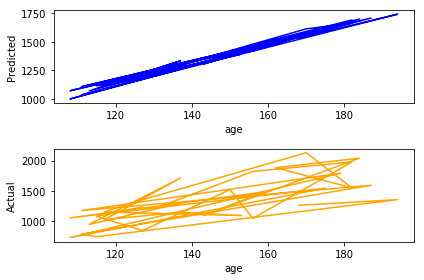

In [9]:
#Visualising the results
import numpy as np
print("Final regression coefficients are: ",values.b0," , ",values.b1," , ",values.b2)
price_pred=[]
price_true=[]
age_val=[]
bidders_val=[]

# Calculate Predicted Values

points = genfromtxt('auction-csv.csv',delimiter=",")
for i in range(1,len(points)):
    age = points[i,0]
    bidders = points[i,1]
    price = points[i,2]
    age_val.append(points[i,0])
    bidders_val.append(points[i,1])
    price_pred.append(values.b0+values.b1*age+values.b2*bidders)
    price_true.append(points[i,2])
plt.subplot(2,1,1)
plt.plot(np.array(age_val),np.array(price_pred),color="blue")
plt.xlabel('age')
plt.ylabel('Predicted')

plt.subplot(2,1,2)
plt.xlabel('age')
plt.ylabel('Actual')
plt.plot(np.array(age_val),np.array(price_true),color="orange")

plt.tight_layout()
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
xx1, xx2 = np.meshgrid(np.linspace(min(age_val),max(age_val), 10), np.linspace(min(bidders_val), max(bidders_val), 10))
# plot the hyperplane by evaluating the parameters on the grid
Z = values.b0+values.b1 * xx1 + values.b2 * xx2 

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

ax.set_xlabel('Age')
ax.set_ylabel('Bidders')
ax.set_zlabel('Price')

# plot predicted plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
# plot actual data 
ax.scatter(age_val, bidders_val, price_pred,'*', color='red', alpha=1.0, facecolor='orange')